In [1]:
# Импортируем бибилиотеки

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [2]:
y= pd.read_csv('ttt2_1.csv')

In [3]:
xx=y.loc[:, 'Адресат']

In [4]:
qq=[]
for i in xx:
    qq.append(i)
qq

['Уразов Р.Н.',
 'Уразов Р.Н.',
 'Уразов Р.Н.',
 'Иванюк Л.А.',
 'Уразов Р.Н.',
 'Миронова С.В.',
 'Уразов Р.Н.',
 'Тымчиков А.Ю.',
 'Уразов Р.Н.',
 'Уразов Р.Н.',
 'Крайчинская С.Б.',
 'Антонов Ю.В.',
 'Уразов Р.Н.',
 'Уразов Р.Н.',
 'Тымчиков А.Ю.',
 'Глушко Д.Е.',
 'Глушко Д.Е.',
 'Уразов Р.Н.',
 'Глушко Д.Е.',
 'Глушко Д.Е.',
 'Глушко Д.Е.',
 'Уразов Р.Н.',
 'Глушко Д.Е.',
 'Уразов Р.Н.',
 'Глушко Д.Е.',
 'Уразов Р.Н.',
 'Глушко Д.Е.',
 'Антонов Ю.В.',
 'Крайчинская С.Б.',
 'Уразов Р.Н.',
 'Антонов Ю.В.',
 'Уразов Р.Н.',
 'Аштаева К.Д.',
 'Глушко Д.Е.',
 'Антонов Ю.В.',
 'Митькина А.Н.',
 'Уразов Р.Н.',
 'Уразов Р.Н.',
 'Желковский И.И.',
 'Глушко Д.Е.',
 'Глушко Д.Е.',
 'Митяева И.В.',
 'Глушко Д.Е.',
 'Митькина А.Н.',
 'Глушко Д.Е.',
 'Глушко Д.Е.',
 'Уразов Р.Н.',
 'Тымчиков А.Ю.',
 'Тымчиков А.Ю.',
 'Уразов Р.Н.',
 'Глушко Д.Е.',
 'Уразов Р.Н.',
 'Уразов Р.Н.',
 'Антонов Ю.В.',
 'Антонов Ю.В.',
 'Уразов Р.Н.',
 'Глушко Д.Е.',
 'Уразов Р.Н.',
 'Глушко Д.Е.',
 'Уразов Р.Н.',
 'Ур

In [5]:
y

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,43564.0,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),возможн использ сет изд информацион ресурс спа...,NaN
1,2,WSR/1-837/2019,43564.0,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,участ совещ вопрос доработк фэ предоставл субс...,NaN
2,3,WSR/1-835/2019,43564.0,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),командир салик к. глушк д. участ засед оргкоми...,NaN
3,4,WSR/1-834/2019,43564.0,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,участ чемпионат мир профессиональн мастерств с...,NaN
4,5,WSR/1-833/2019,43564.0,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,участ церемон откр вузовск чемпионат 15 апр 20...,NaN
...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,43040.0,11\n20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,протокол засед президиум совет президент рф ст...,NaN
4963,4964,WSR/1.-1751/2017,43040.0,ТС-1164/06\n31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,провед 21.11.2017 засед организацион комитет п...,NaN
4964,4965,WSR/1.-1748/2017,43040.0,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,протокол засед рабоч групп приоритетн проект н...,NaN
4965,4966,WSR/1.-1747/2017,43040.0,ЛО-93/06пр\n24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,протокол засед рабоч групп приоритетн проект н...,NaN


In [45]:
rr=[]
for i in range(0, len(qq)):
    if qq.count(qq[i]) >= 2:
        if (qq[i] not in rr and qq[i]):
            rr.append(qq[i])
rr

['Уразов Р.Н.',
 'Иванюк Л.А.',
 'Миронова С.В.',
 'Тымчиков А.Ю.',
 'Крайчинская С.Б.',
 'Антонов Ю.В.',
 'Глушко Д.Е.',
 'Митькина А.Н.',
 'Желковский И.И.',
 'Митяева И.В.',
 'Мухаметзянов Д.Ф.',
 'Саликова К.В.',
 'Куколев С.В.',
 'Гонтарь М.А.',
 'Недоспасова О.В.',
 'Глушко Д.Е.\nТымчиков А.Ю.',
 'Серафимова О.В.',
 'Селукова А.И.',
 'Зайчикова И.А.',
 'Зензинова К.В.',
 'Кожевникова Е.И.',
 'Базер О.Э.',
 'Досканова А.В.',
 'Вишнякова О.Б.',
 'Никул Е.В.',
 'Алимов А.А.',
 'Уфимцев Д.А.',
 'Судаков К.Ю.',
 'Лошкарева Е.П.',
 'Иванюк Л.А.\nМитькина А.Н.',
 'Митькина А.Н.\nИванюк Л.А.',
 'Дубицкая Ю.А.',
 'Тымчиков А.Ю.\nГлушко Д.Е.',
 'Дмитриев М.Г.',
 'Крук С.В.',
 'Глушко Д.Е.\nНедоспасова О.В.',
 'Кононова Н.А.\nНикул Е.В.',
 'Никул Е.В.\nКононова Н.А.',
 'Лысова С.И.',
 'Тымчиков А.Ю.\nНикул Е.В.',
 'Глушко Д.Е.\nЛысова С.И.',
 'Лисова Т.А.',
 'Митяева И.В.\nНикул Е.В.',
 'Глушко Д.Е.\nНикул Е.В.',
 'Федосеев А.И.',
 'Лысова С.И.\nТымчиков А.Ю.',
 'Суперекин И.Ю.',
 'Никул Е.

In [7]:
['Уразов Р.Н.',
 'Иванюк Л.А.',
 'Миронова С.В.',
 'Тымчиков А.Ю.',
 'Крайчинская С.Б.',
 'Антонов Ю.В.',
 'Глушко Д.Е.',
 'Митькина А.Н.',
 'Митяева И.В.',
 'Мухаметзянов Д.Ф.',
 'Саликова К.В.',
 'Куколев С.В.',
 'Гонтарь М.А.',
 'Недоспасова О.В.',
 'Селукова А.И.',
 'Зензинова К.В.',
 'Кожевникова Е.И.',
 'Досканова А.В.',
 'Никул Е.В.',
 'Алимов А.А.',
 'Уфимцев Д.А.',
 'Судаков К.Ю.',
 'Лошкарева Е.П.',
 'Дубицкая Ю.А.',
 'Дмитриев М.Г.',
 'Крук С.В.',
 'Лысова С.И.',
 'Федосеев А.И.',
 'Суперекин И.Ю.',
 'Хворостяная И.В.']

['Уразов Р.Н.',
 'Иванюк Л.А.',
 'Миронова С.В.',
 'Тымчиков А.Ю.',
 'Крайчинская С.Б.',
 'Антонов Ю.В.',
 'Глушко Д.Е.',
 'Митькина А.Н.',
 'Митяева И.В.',
 'Мухаметзянов Д.Ф.',
 'Саликова К.В.',
 'Куколев С.В.',
 'Гонтарь М.А.',
 'Недоспасова О.В.',
 'Селукова А.И.',
 'Зензинова К.В.',
 'Кожевникова Е.И.',
 'Досканова А.В.',
 'Никул Е.В.',
 'Алимов А.А.',
 'Уфимцев Д.А.',
 'Судаков К.Ю.',
 'Лошкарева Е.П.',
 'Дубицкая Ю.А.',
 'Дмитриев М.Г.',
 'Крук С.В.',
 'Лысова С.И.',
 'Федосеев А.И.',
 'Суперекин И.Ю.',
 'Хворостяная И.В.']

In [8]:
ww=y.fillna(' ')

In [9]:
a=ww.head(1000)

In [10]:
a

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
0,1,WSR/1-838/2019,43564,208-409\n08.04.2019,Уразов Р.Н.,Антонова С.В. (АО «Интерфакс»),возможн использ сет изд информацион ресурс спа...,
1,2,WSR/1-837/2019,43564,05-338\n09.04.2019,Уразов Р.Н.,Картошкин С.А. (Министерство просвещения Росси...,участ совещ вопрос доработк фэ предоставл субс...,
2,3,WSR/1-835/2019,43564,И10-14/3137\n09.04.2019,Уразов Р.Н.,Цивилев С.Е. (Администрация Кемеровской области),командир салик к. глушк д. участ засед оргкоми...,
3,4,WSR/1-834/2019,43564,Д2/7121-ИС\n03.04.2019,Иванюк Л.А.,Волков Г.А. (Министерство транспорта Российско...,участ чемпионат мир профессиональн мастерств с...,
4,5,WSR/1-833/2019,43564,15-20/06-911\n08.04.2019,Уразов Р.Н.,Атанов И.В. (Ставропольский государственный аг...,участ церемон откр вузовск чемпионат 15 апр 20...,
...,...,...,...,...,...,...,...,...
995,996,WSR/1.6-3189/2018,43448,10535\n14.12.2018,Крайчинская С.Б.,Санчаа Т.О. (Министерство образования и науки ...,планиров программ повыш квалификац преподавате...,
996,997,WSR/1.6-3190/2018,43448,01-08/4599\n05.12.2018,Крайчинская С.Б.,"Крючкова Т.П. (Департамент образования, культу...",планиров программ повыш квалификац преподавате...,
997,998,WSR/1-3188/2018,43447,12022/02-19/Аи\n12.12.2018,Никул Е.В.\nКононова Н.А.,Подсадник Л.А. (Правительство Республики Карелия),провед отрасл чемпионат стандарт WorldSkills с...,
998,999,WSR/1-3187/2018,43447,80\n13.12.2018,Тымчиков А.Ю.,Клюева Г.А. (Институт развития образования Пер...,назнач главн эксперт компетенц администриров отел,


In [11]:
b=ww.tail(3967)

In [12]:
b

,№ п/п,№\nдокумента,Дата\nрегистрации,Исх. №\nДата,Адресат,Автор,Краткое\nсодержание,Примечание
1000,1001,WSR/1-3185/2018,43447,2018-216/ПВ-Н\n06.12.2018,Уразов Р.Н.,Москвичева О.А. (Департамент образования город...,снят контрол предпис 2018-216/пв-н 17 ма 2018г,
1001,1002,WSR/1.5-3184/2018,43447,6-1/4288\n14.11.2018,Глушко Д.Е.,Шевцова Т.А. (Департамент образования Орловско...,запрос информац план провед демонстрацион экз ...,
1002,1003,WSR/1-3182/2018,43447,14-13-11/8848/18\n12.12.2018,Никул Е.В.\nКононова Н.А.,Казиев М.Н. (Министерство труда и социального ...,провед отрасл чемпионат стандарт WorldSkills с...,
1003,1004,WSR/1-3181/2018,43447,858\n12.12.2018,Уразов Р.Н.,"Ермошкина Е.М. (ООО СП ""СОДРУЖЕСТВО"")",участ экспертн семинар доклад оп подготовк чем...,
1004,1005,WSR/1-3183/2018,43447,12545/18\n12.12.2018,Уразов Р.Н.,Бурганов Р.Т. (Министерство образования и наук...,национальн чемпионат 2019,
...,...,...,...,...,...,...,...,...
4962,4963,WSR/1.-1749/2017,43040,11\n20.10.2017,Уразов Р.Н.,Медведев Д.А. (Аппарат Правительства Российско...,протокол засед президиум совет президент рф ст...,
4963,4964,WSR/1.-1751/2017,43040,ТС-1164/06\n31.10.2017,Уразов Р.Н.,Синюгина Т.Ю. (Министерство образования и наук...,провед 21.11.2017 засед организацион комитет п...,
4964,4965,WSR/1.-1748/2017,43040,ЛО-95/06пр,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,протокол засед рабоч групп приоритетн проект н...,
4965,4966,WSR/1.-1747/2017,43040,ЛО-93/06пр\n24.10.2017,Уразов Р.Н.,Огородова Л.М. (Министерство образования и нау...,протокол засед рабоч групп приоритетн проект н...,


In [13]:
# Делим данные на тестовые и тренировочные наборы

train_df = b
test_df = a
test_df.reset_index(drop=True,inplace=True)

In [14]:
train_x_df = train_df['Краткое\nсодержание'] #изначальные тренер даннные по кр содерж
train_y_df = train_df['Адресат']          #то что мы будем угадывать

test_x_df = test_df['Краткое\nсодержание']
test_y_df = test_df['Адресат']

# Валидация
#x_train, x_val, y_train, y_val = train_test_split(x_df,y_df, test_size=0.2,random_state=42)

In [15]:
train_x_df.shape, test_x_df.shape, train_y_df.shape, test_y_df.shape

((3967,), (1000,), (3967,), (1000,))

In [16]:
# Подключаем библиотеки
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report

In [17]:
# Используем CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,1),min_df=5).fit(a['Краткое\nсодержание'])

x_train_vector = vectorizer.transform(train_x_df)
x_val_vector = vectorizer.transform(test_x_df)

In [39]:
print(x_val_vector[0][0])

  (0, 56)	1
  (0, 106)	1
  (0, 242)	1
  (0, 285)	1


In [42]:
print(test_x_df)

0      возможн использ сет изд информацион ресурс спа...
1      участ совещ вопрос доработк фэ предоставл субс...
2      командир салик к. глушк д. участ засед оргкоми...
3      участ чемпионат мир профессиональн мастерств с...
4      участ церемон откр вузовск чемпионат 15 апр 20...
                             ...                        
995    планиров программ повыш квалификац преподавате...
996    планиров программ повыш квалификац преподавате...
997    провед отрасл чемпионат стандарт WorldSkills с...
998    назнач главн эксперт компетенц администриров отел
999    направл протокол совещ обсужд проект методичес...
Name: Краткое\nсодержание, Length: 1000, dtype: object


In [19]:
cross_val_score(LogisticRegression(random_state=42), x_train_vector, train_y_df, cv=10, verbose=1, n_jobs=-1).mean()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
G:\anaaaaa\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:   19.7s remaining:   13.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   23.5s finished


0.6153149886777091

In [44]:
# Импортируем библиотеки
from sklearn import datasets
from sklearn.cluster import KMeans

# Загружаем набор данных
iris_df = pd.read_csv('ttt2_1.csv')

# Описываем модель
model = KMeans(n_clusters=38)

# Проводим моделирование
model.fit(x_train_vector)

# Предсказание на единичном примере
predicted_label = model.predict(x_val_vector[0][0])

# Предсказание на всем наборе данных
all_predictions = model.predict(x_val_vector)

# Выводим предсказания
print(predicted_label)
print(all_predictions)

[2]
[ 2 37 13 12 30 12 20  8  8 31  0  2  2  0  8 37 37 17 27 37 37 16  2 30
 13 37 37 12 16  2  8 13 12  2 12  8  8  2 28  2 27  1 37  8  1 37  1  2
  2 24  1 17  8 12 12 17 37 31  2 16  2 12  2 20  1  2  2  1  2  1 17 17
 17 17 17 23 28  2  2  8  2  8 31  8  8  8 37 37  2 17  1 15  2  2  8  4
 17  2 12 24  2  2  2  2  2  2  2 17  2 37  1  2  2 12  1  1  1 20 26 13
  5 13  2 20  2  2 23 22  0  2 20 37 23 23  2 23  2 35 12 35 17 13 35  2
 31 13  8 16 13 23  2  2  2 12  2  2 37 31 37 31  2  1 12  8  2  2  2 16
  2  0 11  2 35 20  1  7 23  2  1 30  8  8 12 23 37 37  1  7  8 12  8  2
  2 23 23 13  1  2  2  2 31  0 23  2  1  2 13  2 30 37 37  2  2 24 23 16
 23 30 37  1  2 17  1 12 17 12  0  2 13  8  2 23  2 23  2 30 12  2  7 16
  1 15  2 37  2  2 27  2  1  2  9  8 12 13 33 23 12 12  2 36  2 31 13 20
  2  2 12  8  2 25  8  8 12  2  1  1  8  8 37 22  8  2  2  2 30  8 16 23
 17 20  2 23  8  2  1 12  2  8  2  1  1  1 30  2  8  8 17  8  7 12  8  1
 12 17 33 12  2  2  2  7  8 17 12 13 12 16  1  

In [28]:
# Импортируем библиотеки
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# Создаем датафрейм
seeds_df = pd.read_csv('ttt2_1.csv')

# Исключаем информацию об образцах зерна, сохраняем для дальнейшего использования
#varieties = list(seeds_df.pop('grain_variety'))

# Извлекаем измерения как массив NumPy
#samples = seeds_df.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(x_train_vector, method='complete')

# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=6,
           )

plt.show()

ValueError: setting an array element with a sequence.

In [47]:
ooo=[]
for i in range(0,37):
    ooo.append(i)
ooo

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36]

ValueError: 'c' argument has 1 elements, which is inconsistent with 'x' and 'y' with size 3967.

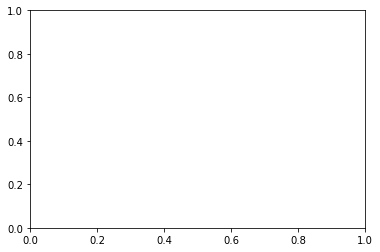

In [49]:
# Импорт библиотек
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Загрузка датасета
#seeds_df = pd.read_csv('ttt2_1.csv')

# Определяем модель и скорость обучения
model = TSNE(learning_rate=100)

# Обучаем модель
transformed = model.fit_transform(x_train_vector)

# Представляем результат в двумерных координатах
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis, y_axis, c=38/255) #то что вектор 
plt.show()

In [ ]:
# позитивный(2), негативный(0) и нейтральный (1)

model = LogisticRegression(random_state=42).fit(x_train_vector, train_y_df)
print(classification_report(test_y_df, model.predict(x_val_vector),target_names = ['Уразов Р.Н.',
 'Иванюк Л.А.',
 'Миронова С.В.',
 'Тымчиков А.Ю.',
 'Крайчинская С.Б.',
 'Антонов Ю.В.',
 'Глушко Д.Е.',
 'Митькина А.Н.',
 'Желковский И.И.',
 'Митяева И.В.',
 'Мухаметзянов Д.Ф.',
 'Саликова К.В.',
 'Куколев С.В.',
 'Гонтарь М.А.',
 'Недоспасова О.В.',
 'Глушко Д.Е.\nТымчиков А.Ю.',
 'Серафимова О.В.',
 'Селукова А.И.',
 'Зайчикова И.А.',
 'Зензинова К.В.',
 'Кожевникова Е.И.',
 'Базер О.Э.',
 'Досканова А.В.',
 'Вишнякова О.Б.',
 'Никул Е.В.',
 'Алимов А.А.',
 'Уфимцев Д.А.',
 'Судаков К.Ю.',
 'Лошкарева Е.П.',
 'Иванюк Л.А.\nМитькина А.Н.',
 'Митькина А.Н.\nИванюк Л.А.',
 'Дубицкая Ю.А.',
 'Тымчиков А.Ю.\nГлушко Д.Е.',
 'Дмитриев М.Г.',
 'Крук С.В.',
 'Глушко Д.Е.\nНедоспасова О.В.',
 'Кононова Н.А.\nНикул Е.В.',
 'Никул Е.В.\nКононова Н.А.',
 'Лысова С.И.',
 'Тымчиков А.Ю.\nНикул Е.В.',
 'Глушко Д.Е.\nЛысова С.И.',
 'Лисова Т.А.',
 'Митяева И.В.\nНикул Е.В.',
 'Глушко Д.Е.\nНикул Е.В.',
 'Федосеев А.И.',
 'Лысова С.И.\nТымчиков А.Ю.',
 'Суперекин И.Ю.',
 'Никул Е.В.\nГлушко Д.Е.',
 'Саликова К.В.\nНикул Е.В.',
 'Глушко Д.Е.\nКуколев С.В.',
 'Никул Е.В.\nТымчиков А.Ю.',
 'Лысова С.И.\nТымчиков А.Ю.\nСаликова К.В.',
 'Тымчиков А.Ю.\nНикул Е.В.',
 'Досканова А.В.',
 'Глушко Д.Е.\nУразов Р.Н.',
 'Хворостяная И.В.',
 'Сумакова Е.Д.',
 'Покровская И.В.',
 'Смирнова Л.В.',
 'Глушко Д.Е.\nСаликова К.В.',
 'Уразов Р.Н.\nТымчиков А.Ю.',
 'Мартынюк Е.Д.',
 'Степаненко Е.А.',
 'Базер О.Э.\nИванюк Л.А.',
 'Абдуллин А.М.',
 'Недоспасова О.В.',
 'Хворостяная И.В.',
 'Куколев С.В.\nСудаков К.Ю.',
 'Уразов Р.Н.\nГлушко Д.Е.']))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=3000, random_state=0)
text_classifier.fit(x_train_vector, train_y_df)

In [ ]:
predictions = text_classifier.predict(x_val_vector)
print(predictions)

In [ ]:
print(test_x_df)

In [ ]:
# проверяем точность модели, используя confusion matrix с F1 мерой 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_y_df,predictions))
print(classification_report(test_y_df,predictions))
print(accuracy_score(test_y_df, predictions))